In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [77]:
df1 = pd.read_csv("tw_house_prices.csv")
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,"Zhongzheng Dist., Taipei City",2 BHK,1056,2.0,1.0,203.164
1,Plot Area,Ready To Move,"Datong Dist., Taipei City",4 Bedroom,2600,5.0,3.0,624.000
2,Built-up Area,Ready To Move,"Zhongshan Dist., Taipei City",3 BHK,1440,2.0,3.0,322.400
3,Super built-up Area,Ready To Move,"Songshan Dist., Taipei City",3 BHK,1521,3.0,1.0,494.000
4,Super built-up Area,Ready To Move,"Da’an Dist., Taipei Ci",2 BHK,1200,2.0,1.0,265.200


In [78]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [79]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [80]:
df1['area_type'].value_counts()

Super built-up  Area    8629
Built-up  Area          2371
Plot  Area              1983
Carpet  Area              87
Name: area_type, dtype: int64

### Data Cleansing
- handle na values

In [3]:
df1.shape

(13070, 8)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2371
Carpet  Area              87
Plot  Area              1983
Super built-up  Area    8629
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,"Zhongzheng Dist., Taipei City",2 BHK,1056,2.0,101.582
1,"Datong Dist., Taipei City",4 Bedroom,2600,5.0,312.000
2,"Zhongshan Dist., Taipei City",3 BHK,1440,2.0,161.200
3,"Songshan Dist., Taipei City",3 BHK,1521,3.0,247.000
4,"Da’an Dist., Taipei Ci",2 BHK,1200,2.0,132.600


In [6]:
df2.isnull().sum()

location       0
size          14
total_sqft     0
bath          71
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(12999, 5)

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Feature Engineering
**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)** 

In [10]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,"Zhongzheng Dist., Taipei City",2 BHK,1056,2.0,101.582,2
1,"Datong Dist., Taipei City",4 Bedroom,2600,5.0,312.000,4
2,"Zhongshan Dist., Taipei City",3 BHK,1440,2.0,161.200,3
3,"Songshan Dist., Taipei City",3 BHK,1521,3.0,247.000,3
4,"Da’an Dist., Taipei Ci",2 BHK,1200,2.0,132.600,2


In [81]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,"Guantian Dist., Tainan City",27 BHK,8000,27.0,598.0,27
4666,"Guanmiao Dist., Tainan City",43 Bedroom,2400,40.0,1716.0,43


In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1454', '774', '4689'], dtype=object)

**Explore total_sqft features**

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,"Pingxi Dist., New Taipei City",4 BHK,2100 - 2850,4.0,483.600,4
122,"Wuri Dist., Taichung City",4 BHK,3067 - 8156,4.0,1240.200,4
137,"Dajia Dist., Taichung City",2 BHK,1042 - 1105,2.0,140.413,2
165,"Nantou City, Nantou County",2 BHK,1145 - 1340,2.0,113.074,2
188,"Taibao City, Chiayi County",2 BHK,1015 - 1540,2.0,147.680,2
410,"Sanxia Dist., New Taipei City",1 BHK,34.46Sq. Meter,1.0,48.100,1
549,"East Dist., Chiayi City",2 BHK,1195 - 1440,2.0,165.802,2
648,"Mituo Dist., Kaohsiung City",9 Bedroom,4125Perch,9.0,689.000,9
661,"Jiaxian Dist., Kaohsiung City",2 BHK,1120 - 1145,2.0,125.138,2
672,"Jinsha Township, Kinmen County",4 Bedroom,3090 - 5002,4.0,1157.000,4


- Above shows that total_sqft can be a range. So I take the average of min and max value in the range. and the 34.46Sq.Meter can convert to square ft using unit conversion. But I decide to drop it because it is too small.

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2166')

2166.0

In [19]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [20]:
convert_sqft_to_num('34.46Sq. Meter')

In [21]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,"Zhongzheng Dist., Taipei City",2 BHK,1056.0,2.0,101.582,2
1,"Datong Dist., Taipei City",4 Bedroom,2600.0,5.0,312.000,4
2,"Zhongshan Dist., Taipei City",3 BHK,1440.0,2.0,161.200,3


In [22]:
df4.loc[30]

location      Pingxi Dist., New Taipei City
size                                  4 BHK
total_sqft                           2475.0
bath                                    4.0
price                                 483.6
bhk                                       4
Name: 30, dtype: object

- 2475 means average of range 2100-2850

In [23]:
(2100+2850)/2

2475.0

### Feature Engineering
**Add new features price per square feet**

In [24]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,"Zhongzheng Dist., Taipei City",2 BHK,1056.0,2.0,101.582,2
1,"Datong Dist., Taipei City",4 Bedroom,2600.0,5.0,312.000,4
2,"Zhongshan Dist., Taipei City",3 BHK,1440.0,2.0,161.200,3


In [80]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*150000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"Zhongzheng Dist., Taipei City",2 BHK,1056.0,2.0,101.582,2,14429.261364
1,"Datong Dist., Taipei City",4 Bedroom,2600.0,5.0,312.000,4,18000.000000
2,"Zhongshan Dist., Taipei City",3 BHK,1440.0,2.0,161.200,3,16791.666667
3,"Songshan Dist., Taipei City",3 BHK,1521.0,3.0,247.000,3,24358.974359
4,"Da’an Dist., Taipei Ci",2 BHK,1200.0,2.0,132.600,2,16575.000000


In [81]:
len(df5.location.unique())

365

In [82]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Tamsui Dist., New Taipei City       71
Wenshan Dist., Taipei City          40
Bali Dist., New Taipei City         40
Baoshan Township, Hsinchu County    39
Ruifang Dist., New Taipei City      39
                                    ..
Da’an Dist., Taipei Ci               3
Nan’ao Township, Yilan Coun          2
Tai’an Township, Miaoli Coun         2
Su’ao Township, Yilan Coun           2
Ren’ai Dist., Keelung Ci             1
Name: location, Length: 365, dtype: int64

In [74]:
len(location_stats[location_stats<=10])

5

In [75]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Da’an Dist., Taipei Ci          3
Nan’ao Township, Yilan Coun     2
Tai’an Township, Miaoli Coun    2
Su’ao Township, Yilan Coun      2
Ren’ai Dist., Keelung Ci        1
Name: location, dtype: int64

In [76]:
len(df5.location.unique())

365

In [77]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

361

In [78]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"Zhongzheng Dist., Taipei City",2 BHK,1056.0,2.0,101.582,2,19239.015152
1,"Datong Dist., Taipei City",4 Bedroom,2600.0,5.0,312.000,4,24000.000000
2,"Zhongshan Dist., Taipei City",3 BHK,1440.0,2.0,161.200,3,22388.888889
3,"Songshan Dist., Taipei City",3 BHK,1521.0,3.0,247.000,3,32478.632479
4,other,2 BHK,1200.0,2.0,132.600,2,22100.000000
5,"Wanhua Dist., Taipei City",2 BHK,1170.0,2.0,98.800,2,16888.888889
6,"Xinyi Dist., Taipei City",4 BHK,2732.0,4.0,530.400,4,38828.696925
7,"Shilin Dist., Taipei City",4 BHK,3300.0,4.0,1560.000,4,94545.454545
8,"Beitou Dist., Taipei City",3 BHK,1310.0,3.0,164.450,3,25106.870229
9,"Neihu Dist., Taipei City",6 Bedroom,1020.0,6.0,962.000,6,188627.450980


In [79]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,"Neihu Dist., Taipei City",6 Bedroom,1020.0,6.0,962.0,6,188627.450980
45,"Linkou Dist., New Taipei City",8 Bedroom,600.0,9.0,520.0,8,173333.333333
58,"Sanxing Township, Yilan County",6 Bedroom,1407.0,4.0,390.0,6,55437.100213
68,"Zhubei City, Hsinchu County",8 Bedroom,1350.0,7.0,221.0,8,32740.740741
70,"Xinfeng Township, Hsinchu County",3 Bedroom,500.0,3.0,260.0,3,104000.000000


In [34]:
df5.shape

(12999, 7)

In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12271, 7)

In [36]:
df6.price_per_sqft.describe()

count     12225.000000
mean      29546.460398
std       19574.183557
min        1253.443526
25%       19705.263158
50%       24780.635401
75%       32400.000000
max      825882.352941
Name: price_per_sqft, dtype: float64

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10190, 7)

In [38]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,"Alian Dist., Kaohsiung City",2 BHK,883.0,2.0,117.00,2,23850.509626
1,"Alian Dist., Kaohsiung City",1 BHK,750.0,1.0,104.00,1,24960.000000
2,"Alian Dist., Kaohsiung City",3 BHK,1100.0,3.0,137.80,3,22549.090909
3,"Alian Dist., Kaohsiung City",4 Bedroom,4000.0,4.0,858.00,4,38610.000000
4,"Alian Dist., Kaohsiung City",2 BHK,985.0,2.0,150.80,2,27557.360406
...,...,...,...,...,...,...,...
10185,other,3 BHK,1630.0,2.0,254.80,3,28137.423313
10186,other,3 BHK,1260.0,2.0,221.13,3,31590.000000
10187,other,2 BHK,1160.0,2.0,114.40,2,17751.724138
10188,other,3 BHK,1150.0,2.0,201.50,3,31539.130435


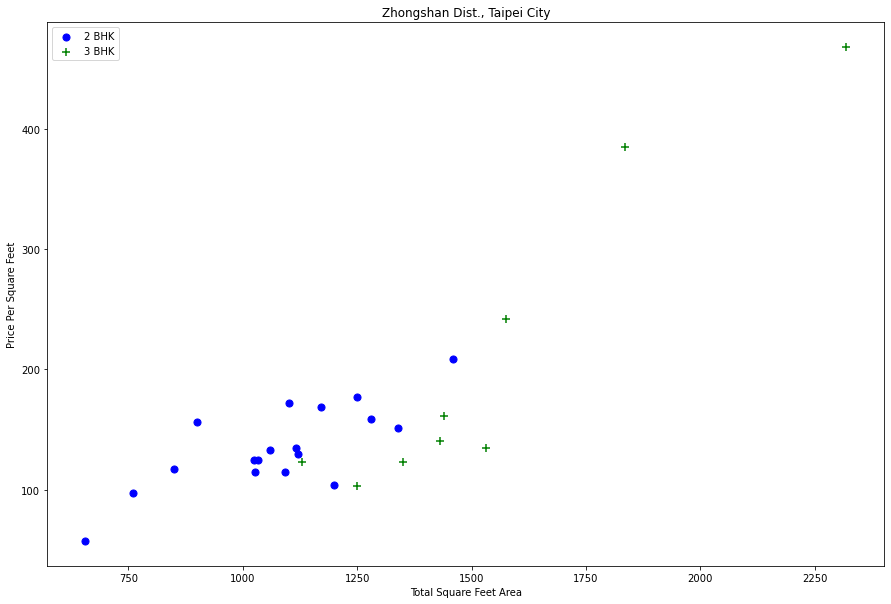

In [39]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, marker='+', color = 'green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Zhongshan Dist., Taipei City")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment(with same square ft area). What we will do so is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean':4000,
        'std' : 4300,
        'count' :34
    },
    '2': {
        'mean':4300,
        'std': 2300,
        'count':22
    },
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats =bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values
            )
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(8374, 7)

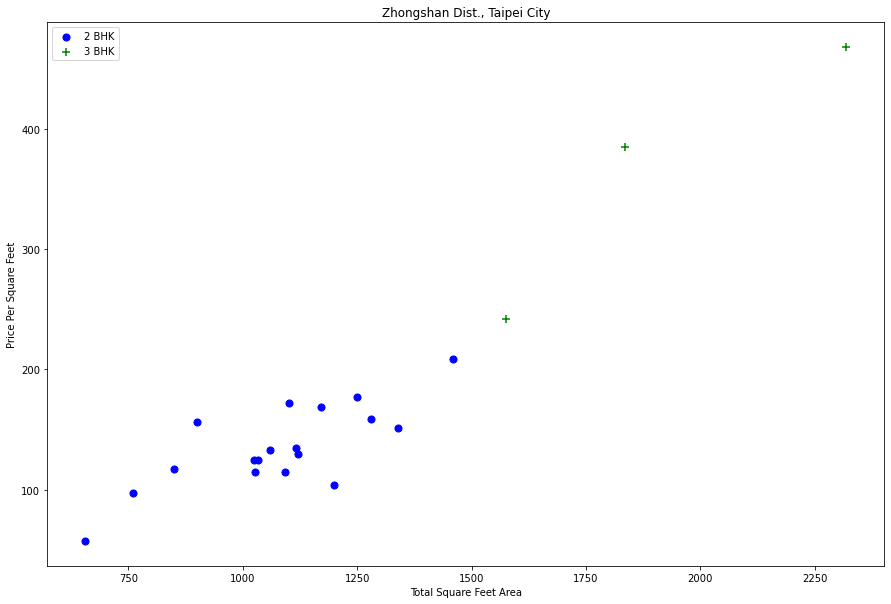

In [41]:
plot_scatter_chart(df8, "Zhongshan Dist., Taipei City")

Text(0, 0.5, 'Count')

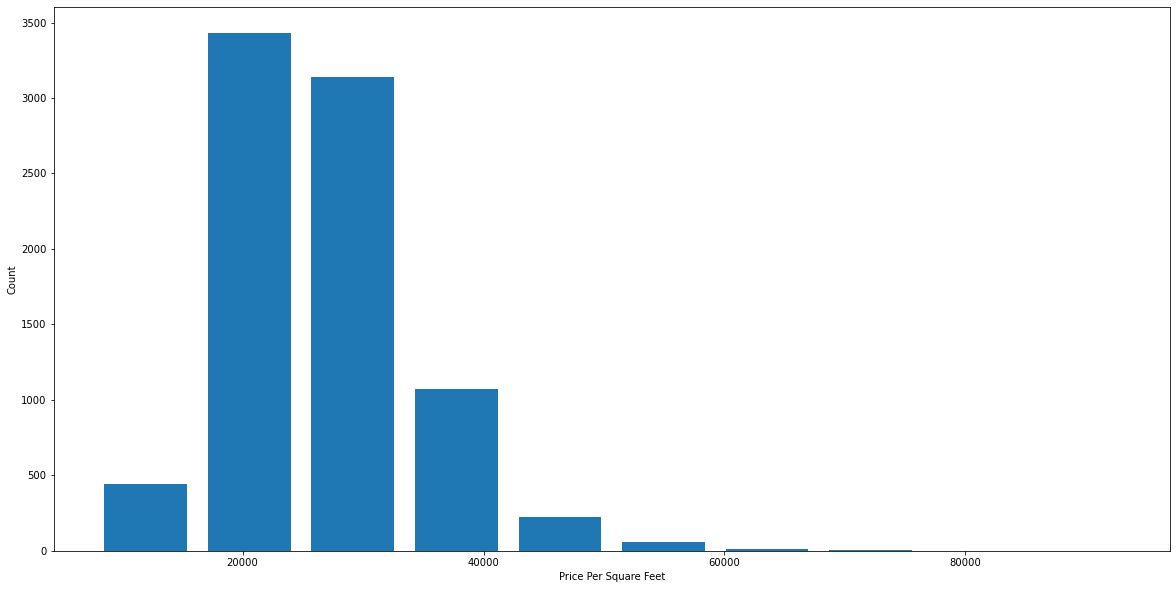

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df8.bath.unique()

array([ 2.,  1.,  3.,  4.,  6.,  5.,  7.,  9.,  8., 16., 13., 12.])

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2345,"Gangshan Dist., Kaohsiung City",16 BHK,10000.0,16.0,1430.0,16,25740.000000
6304,"Shanlin Dist., Kaohsiung City",13 BHK,5425.0,13.0,715.0,13,23723.502304
7448,"Touwu Township, Miaoli County",10 BHK,4000.0,12.0,416.0,10,18720.000000
8534,"Xinshe Dist., Taichung City",10 BHK,12000.0,12.0,1365.0,10,20475.000000


Text(0, 0.5, 'Count')

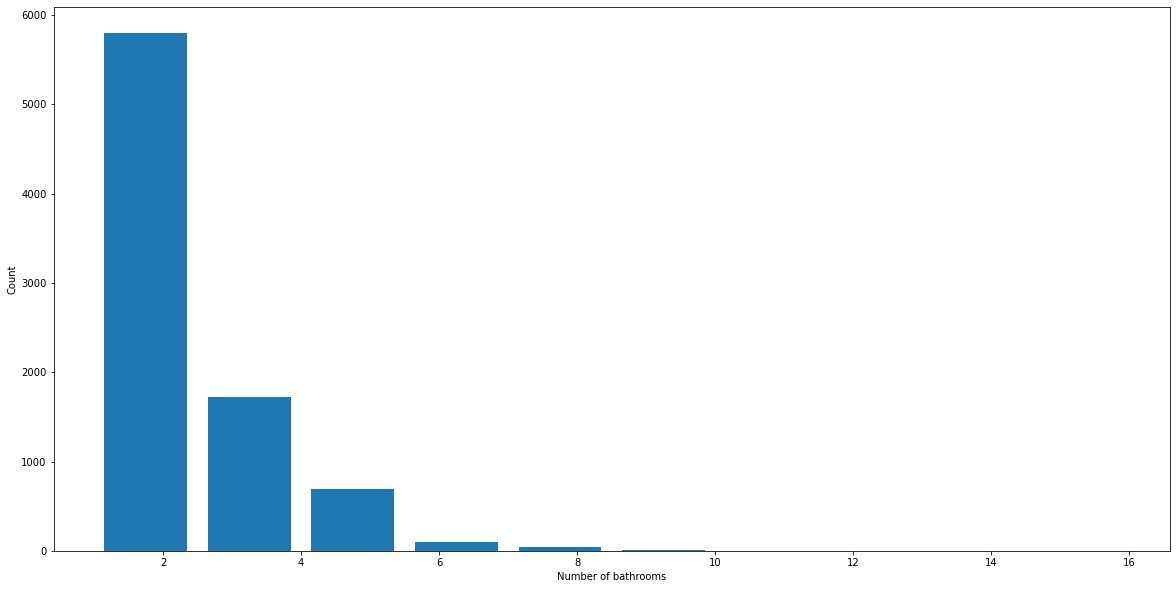

In [45]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3209,"Jiali Dist., Tainan City",4 Bedroom,7000.0,8.0,1170.0,4,30085.714286
5903,"Rende Dist., Tainan City",3 BHK,1806.0,6.0,301.6,3,30059.800664


In [47]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(8299, 7)

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')   # ML cannot read text data
df10.head()

,location,total_sqft,bath,price,bhk
0,"Alian Dist., Kaohsiung City",883.0,2.0,117.0,2
1,"Alian Dist., Kaohsiung City",750.0,1.0,104.0,1
2,"Alian Dist., Kaohsiung City",1100.0,3.0,137.8,3
3,"Alian Dist., Kaohsiung City",4000.0,4.0,858.0,4
4,"Alian Dist., Kaohsiung City",985.0,2.0,150.8,2


In [49]:
# transform text data which is a categorial information
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,"Alian Dist., Kaohsiung City","Alishan Township, Chiayi County","Anding Dist., Tainan City","Anle Dist., Keelung City","Annan Dist., Tainan City","Anping Dist., Tainan City","Bade Dist., Taoyuan City","Baihe Dist., Tainan City","Baisha Township, Penghu County","Bali Dist., New Taipei City",...,"Zhuolan Township, Miaoli County","Zhuoxi Township, Hualien County","Zhuqi Township, Chiayi County","Zhushan Township, Nantou County","Zhutang Township, Changhua County","Zhutian Township, Pingtung County","Ziguan Dist., Kaohsiung City","Zuoying Dist., Kaohsiung City","Zuozhen Dist., Tainan City",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,"Alian Dist., Kaohsiung City","Alishan Township, Chiayi County","Anding Dist., Tainan City","Anle Dist., Keelung City","Annan Dist., Tainan City",...,"Zhuolan Township, Miaoli County","Zhuoxi Township, Hualien County","Zhuqi Township, Chiayi County","Zhushan Township, Nantou County","Zhutang Township, Changhua County","Zhutian Township, Pingtung County","Ziguan Dist., Kaohsiung City","Zuoying Dist., Kaohsiung City","Zuozhen Dist., Tainan City",other
0,"Alian Dist., Kaohsiung City",883.0,2.0,117.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Alian Dist., Kaohsiung City",750.0,1.0,104.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Alian Dist., Kaohsiung City",1100.0,3.0,137.8,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,"Alian Dist., Kaohsiung City","Alishan Township, Chiayi County","Anding Dist., Tainan City","Anle Dist., Keelung City","Annan Dist., Tainan City","Anping Dist., Tainan City",...,"Zhuolan Township, Miaoli County","Zhuoxi Township, Hualien County","Zhuqi Township, Chiayi County","Zhushan Township, Nantou County","Zhutang Township, Changhua County","Zhutian Township, Pingtung County","Ziguan Dist., Kaohsiung City","Zuoying Dist., Kaohsiung City","Zuozhen Dist., Tainan City",other
0,883.0,2.0,117.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,1.0,104.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(8299, 365)

In [53]:
X =df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,"Alian Dist., Kaohsiung City","Alishan Township, Chiayi County","Anding Dist., Tainan City","Anle Dist., Keelung City","Annan Dist., Tainan City","Anping Dist., Tainan City","Bade Dist., Taoyuan City",...,"Zhuolan Township, Miaoli County","Zhuoxi Township, Hualien County","Zhuqi Township, Chiayi County","Zhushan Township, Nantou County","Zhutang Township, Changhua County","Zhutian Township, Pingtung County","Ziguan Dist., Kaohsiung City","Zuoying Dist., Kaohsiung City","Zuozhen Dist., Tainan City",other
0,883.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,750.0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,985.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(8299, 364)

In [55]:
y = df12.price
y.head()

0    117.0
1    104.0
2    137.8
3    858.0
4    150.8
Name: price, dtype: float64

In [56]:
len(y)

8299

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8346800500811024

### Use K Fold cross validation to measure accuracy of LinearRegression Model

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82193178, 0.81785964, 0.83914919, 0.89296832, 0.88912197])

We can see that in 5 iterations we get s score above 80%. This is pretty good but we want to test GridSearch to see if we can get even better score.

### Find the best model using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV   # Hyperparameter Tuning

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.852206,{'normalize': False}
1,lasso,0.853966,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.820699,"{'criterion': 'mse', 'splitter': 'best'}"


We can say that the Lasso gives the best score. But very close to the LinearRegression. Hence we will use that.

In [61]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'Alian Dist., Kaohsiung City',
       'Alishan Township, Chiayi County', 'Anding Dist., Tainan City',
       'Anle Dist., Keelung City', 'Annan Dist., Tainan City',
       'Anping Dist., Tainan City', 'Bade Dist., Taoyuan City',
       ...
       'Zhuolan Township, Miaoli County', 'Zhuoxi Township, Hualien County',
       'Zhuqi Township, Chiayi County', 'Zhushan Township, Nantou County',
       'Zhutang Township, Changhua County',
       'Zhutian Township, Pingtung County', 'Ziguan Dist., Kaohsiung City',
       'Zuoying Dist., Kaohsiung City', 'Zuozhen Dist., Tainan City', 'other'],
      dtype='object', length=364)

### Test the model for some properties

In [62]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [63]:
predict_price('Zuoying Dist., Kaohsiung City',1000, 2, 2)

133.11896139046243

In [64]:
predict_price('Zuoying Dist., Kaohsiung City',1000, 3, 3)

137.22048108357745

In [65]:
predict_price('Songshan Dist., Taipei City',1000, 2, 2)

119.99453714741392

In [66]:
predict_price('Songshan Dist., Taipei City',1000, 3, 3) #--> go to A/B testing and ready for Flask API

124.09605684052897

In [67]:
import pickle
with open('tw_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [68]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))